In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Logistic Regression - Wine Type Classification


In [18]:

df_white = pd.read_csv("../dataset/winequality-white.csv", sep=';', index_col=False)
df_white['type'] = 1  # White wine = 1
df_red = pd.read_csv("../dataset/winequality-red.csv", sep=';', index_col=False)
df_red['type'] = 0  # Red wine = 0

# Concatenar
df_wine = pd.concat([df_red, df_white], ignore_index=True)
print(f"Dataset carregado: {df_wine.shape[0]} linhas e {df_wine.shape[1]} colunas.")
df_wine.head()


Dataset carregado: 6497 linhas e 13 colunas.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [19]:

X_raw = df_wine.drop(['quality', 'type'], axis=1).to_numpy()
y_raw = df_wine['type'].to_numpy()   # 0 = red, 1 = white


In [20]:
#normalizar
mean = np.mean(X_raw, axis=0)
std = np.std(X_raw, axis=0)
X_scaled = (X_raw - mean) / std


In [21]:
# adicionando o intercept
X_final = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])


In [22]:
# dividindo os conjuntos de treino e teste (80% train, 20% test)
np.random.seed(42) 
idx = np.random.permutation(len(X_final))
train_size = int(0.8 * len(X_final))

train_idx, test_idx = idx[:train_size], idx[train_size:]
X_train, X_test = X_final[train_idx], X_final[test_idx]
y_train, y_test = y_raw[train_idx], y_raw[test_idx]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 5197
Test set size: 1300


In [23]:
# inicializar pesos
np.random.seed(42)
n_features = X_final.shape[1]
weights = np.random.randn(n_features) * 0.01
print(f"Initialized weights with shape: {weights.shape}")


Initialized weights with shape: (12,)


In [24]:
def sigmoid(z):

   
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))


Cost Function (Log Loss)



$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))]$

where $h_\theta(x) = \sigma(X \cdot \theta)$ é a probabilidade prevista


In [25]:
def compute_cost(X, y, weights):
  
    m = len(y)
    z = X @ weights
    h = sigmoid(z)

    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost


Gradient Descent

gradient da cost functi:

$\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$




In [26]:
def compute_gradient(X, y, weights):

    m = len(y)
    z = X @ weights
    h = sigmoid(z)
    
    gradient = (1/m) * X.T @ (h - y)
    return gradient


In [27]:
# Treinando 
#parametros de treinamento
learning_rate = 0.01
n_iterations = 1000
cost_history = []

# Gradiente descendente
for i in range(n_iterations):
    # Calcula gradiente
    gradient = compute_gradient(X_train, y_train, weights)

    weights = weights - learning_rate * gradient

    if i % 100 == 0:
        cost = compute_cost(X_train, y_train, weights)
        cost_history.append(cost)
        print(f"Iteration {i}: Cost = {cost:.6f}")

print(f"\nTraining completed! Final cost: {compute_cost(X_train, y_train, weights):.6f}")


Iteration 0: Cost = 0.680713
Iteration 100: Cost = 0.404790
Iteration 200: Cost = 0.298632
Iteration 300: Cost = 0.242238
Iteration 400: Cost = 0.206930
Iteration 500: Cost = 0.182582
Iteration 600: Cost = 0.164692
Iteration 700: Cost = 0.150943
Iteration 800: Cost = 0.140017
Iteration 900: Cost = 0.131106

Training completed! Final cost: 0.123755


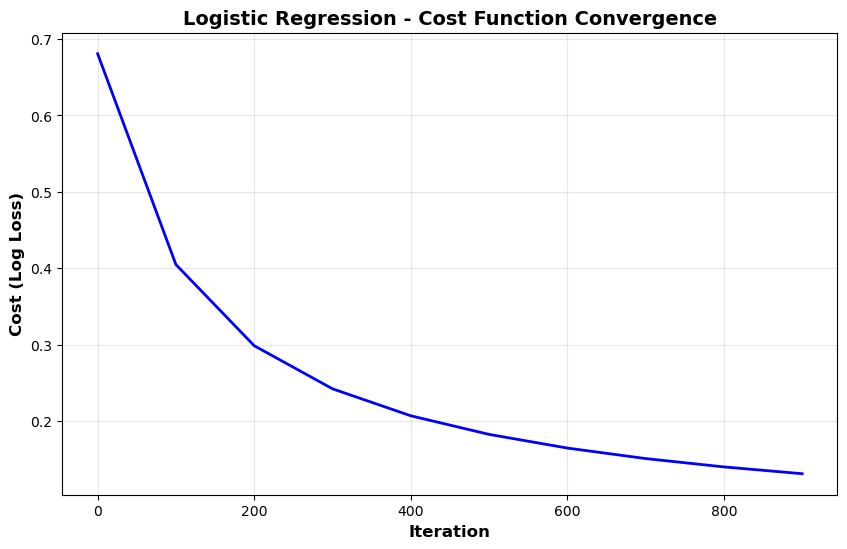

In [28]:

iterations = np.arange(0, n_iterations, 100)
plt.figure(figsize=(10, 6))
plt.plot(iterations, cost_history, 'b-', linewidth=2)
plt.xlabel('Iteration', fontsize=12, fontweight='bold')
plt.ylabel('Cost (Log Loss)', fontsize=12, fontweight='bold')
plt.title('Logistic Regression - Cost Function Convergence', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()


In [29]:
def logistic_predict(X, weights, threshold=0.5):
    
    z = X @ weights
    probabilities = sigmoid(z)
    predictions = (probabilities >= threshold).astype(int)
    return predictions

# Fazendo predições no set de teste
y_pred_logistic = logistic_predict(X_test, weights)


In [30]:
accuracy_logistic = np.mean(y_pred_logistic == y_test)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2%}")

# Salvando regressão logística
import pickle
import os

os.makedirs('models', exist_ok=True)

# salvando pesos
logistic_model_data = {
    'weights': weights,
    'n_features': n_features
}

with open('models/logistic_model.pkl', 'wb') as f:
    pickle.dump(logistic_model_data, f)


TN = np.sum((y_test == 0) & (y_pred_logistic == 0))
FP = np.sum((y_test == 0) & (y_pred_logistic == 1))
FN = np.sum((y_test == 1) & (y_pred_logistic == 0))
TP = np.sum((y_test == 1) & (y_pred_logistic == 1))

acc = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

logistic_metrics = {
    'accuracy': acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'TN': TN,
    'FP': FP,
    'FN': FN,
    'TP': TP,
    'predictions': y_pred_logistic
}

with open('models/logistic_metrics.pkl', 'wb') as f:
    pickle.dump(logistic_metrics, f)

np.save('models/logistic_y_test.npy', y_test)

print("\nLogistic Regression model and metrics saved successfully!")


Logistic Regression Accuracy: 98.54%

Logistic Regression model and metrics saved successfully!


Confusion Matrix


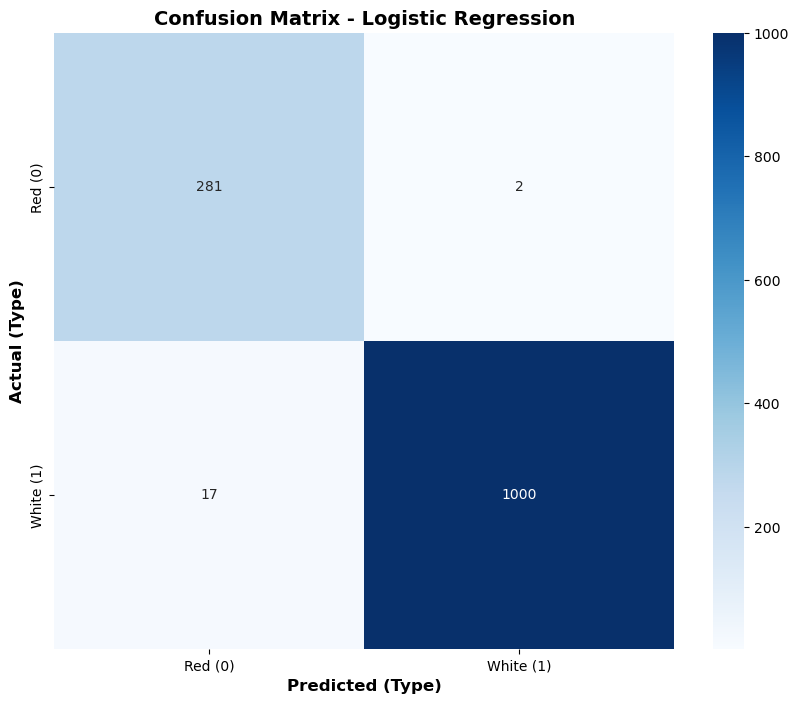


Confusion Matrix Details:
True Negatives (TN):  281
False Positives (FP): 2
False Negatives (FN): 17
True Positives (TP):  1000


In [ ]:

classes = np.unique(y_test)

n_c = len(classes)
conf_matrix_logistic = np.zeros((n_c, n_c), dtype=int)
class_to_idx = {val: i for i, val in enumerate(classes)}

for r, p in zip(y_test, y_pred_logistic):
    conf_matrix_logistic[class_to_idx[r], class_to_idx[p]] += 1

TN = conf_matrix_logistic[0, 0]
FP = conf_matrix_logistic[0, 1]
FN = conf_matrix_logistic[1, 0]
TP = conf_matrix_logistic[1, 1]

matrix = np.array([[TN, FP], [FN, TP]])
class_names = ['Red', 'White']

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(im, ax=ax)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(class_names, fontsize=14)
ax.set_yticklabels(class_names, fontsize=14)

ax.set_xlabel('Predicted (Type)', fontsize=16, fontweight='bold')
ax.set_ylabel('Actual (Type)', fontsize=16, fontweight='bold')
ax.set_title('Confusion Matrix - Logistic Regression', fontsize=18, fontweight='bold')

for i in range(2):
    for j in range(2):
        text = ax.text(j, i, matrix[i, j],
                      ha="center", va="center",
                      color="white" if matrix[i, j] > matrix.max()/2 else "black",
                      fontsize=28, fontweight='bold')

labels = [['True\nNegative', 'False\nPositive'],
          ['False\nNegative', 'True\nPositive']]

for i in range(2):
    for j in range(2):
        text = ax.text(j, i+0.3, labels[i][j],
                      ha="center", va="center", color="gray",
                      fontsize=11, style='italic')

plt.tight_layout()
plt.show()

print("\nConfusion Matrix Details:")
print(f"True Negatives (TN):  {conf_matrix_logistic[0, 0]}")
print(f"False Positives (FP): {conf_matrix_logistic[0, 1]}")
print(f"False Negatives (FN): {conf_matrix_logistic[1, 0]}")
print(f"True Positives (TP):  {conf_matrix_logistic[1, 1]}")


Análise de importancia das features


/tmp/ipykernel_13193/437361192.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Feature', data=df_logistic_importance, palette='coolwarm')


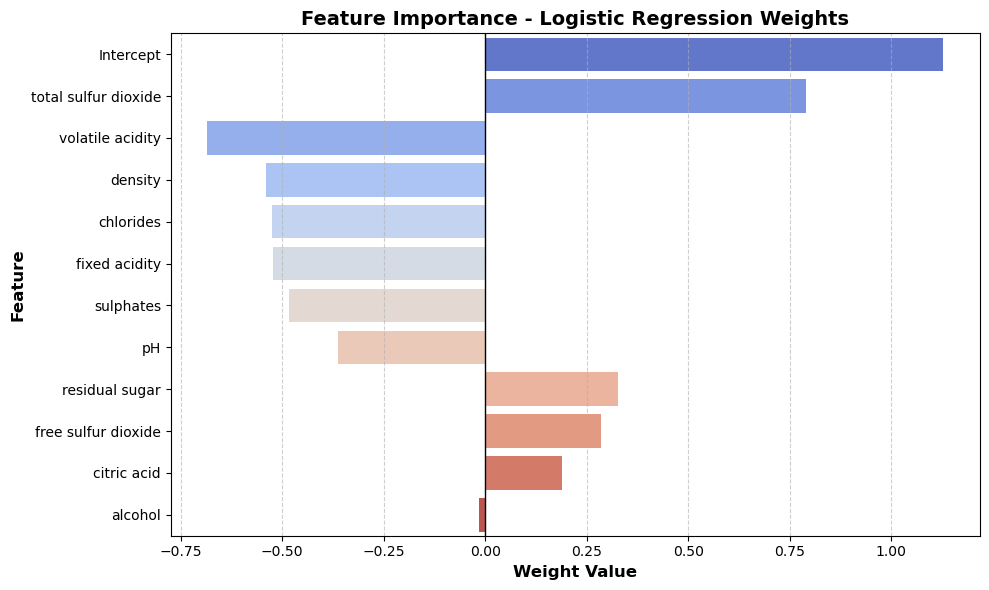


Top 5 Most Important Features (by absolute weight):
                Feature    Weight  Abs_Weight
0             Intercept  1.128441    1.128441
7  total sulfur dioxide  0.790502    0.790502
2      volatile acidity -0.684315    0.684315
8               density -0.538841    0.538841
5             chlorides -0.524061    0.524061


In [32]:
# nome das features
feature_names = df_wine.drop(['quality', 'type'], axis=1).columns.tolist()
feature_names = ['Intercept'] + feature_names

df_logistic_importance = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights
})
df_logistic_importance['Abs_Weight'] = df_logistic_importance['Weight'].abs()
df_logistic_importance = df_logistic_importance.sort_values(by='Abs_Weight', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Weight', y='Feature', data=df_logistic_importance, palette='coolwarm')
plt.title("Feature Importance - Logistic Regression Weights", fontsize=14, fontweight='bold')
plt.xlabel("Weight Value", fontsize=12, fontweight='bold')
plt.ylabel("Feature", fontsize=12, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.tight_layout()
plt.show()

# Mostra as features com maiores pesos
print("\nTop 5 Most Important Features (by absolute weight):")
print(df_logistic_importance[['Feature', 'Weight', 'Abs_Weight']].head())
